# Task 2: Unemployment

## Problem:
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

In [5]:
import pandas as pd
df=pd.read_csv('Unemployment in India.csv')
print("Some information of data ")
print(df)

Some information of data 
             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

 

In [6]:
print("Dataset after cleaning ")
df_cleaned=df.dropna(axis=0)
print(df_cleaned.info())

Dataset after cleaning 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB
None


In [7]:
df_cleaned = df_cleaned.copy()  
df_cleaned[' Date'] = pd.to_datetime(df_cleaned[' Date'])
df_cleaned['Year'] = df_cleaned[' Date'].dt.year

annual_unemployment_rate = df_cleaned.groupby('Year',as_index=False).mean()
print(annual_unemployment_rate)

   Year   Estimated Unemployment Rate (%)   Estimated Employed  \
0  2019                          9.399047         7.422976e+06   
1  2020                         15.101581         6.901357e+06   

    Estimated Labour Participation Rate (%)  
0                                  43.88586  
1                                  40.88829  


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12468\512306988.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_unemployment_rate = df_cleaned.groupby('Year',as_index=False).mean()


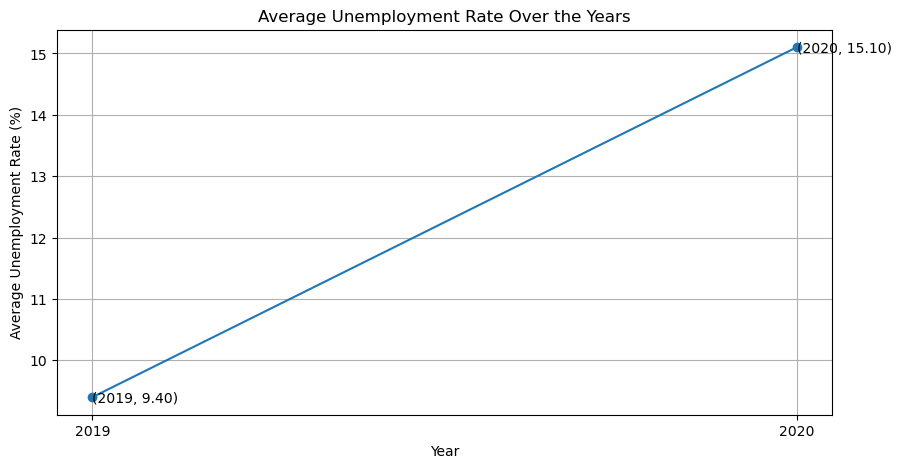

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

# Plotting data
plt.figure(figsize=(10, 5))
xpoints=np.array((annual_unemployment_rate['Year'])).astype(str)
ypoints=np.array(annual_unemployment_rate[' Estimated Unemployment Rate (%)'])
plt.plot(xpoints,ypoints,marker="o")

#naming each points
for x, y in zip(xpoints, ypoints):
    plt.text(x, y, f'({x}, {y:.2f})', ha='left', va='center_baseline')

# Adding labels and title
plt.title('Average Unemployment Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')

# Display the plot
plt.grid(True)
plt.show()